### Interactive Robot Visualization
### EE304: Robotics, IIT Dharwad
#### Created by Dr. Sangamesh Deepak R, March, 2020 

In [1]:
import numpy as np
import ipyvolume as ipv
from IPython.core.debugger import set_trace
import ipywidgets as widgets

In [2]:
def Rx(theta):
    R = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])
    return R

def Ry(theta):
    R = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    return R

def Rz(theta):
    R = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0,0,1]
    ])
    return R
    

In [3]:
# link parameters

a_1 = 1
alpha_1 = 0

a_2 = 0
alpha_2 = np.pi/4

a_3 = np.sqrt(2)
alpha_3 = 0


In [4]:
# joint parameters 

theta_1_default = 0
d_1 = 0

theta_2_default = np.pi/2
d_2 = 0

theta_3_default = -np.pi/2
d_3 = np.sqrt(2)

theta_4_default = 0
d_4 = 0

In [5]:
T_0 = np.block([
        [Rz(0), np.array([[0],[0],[0]])],
        [np.array([[0,0,0,1]])]
    ])

T_1_dash_1 = np.block([
            [Rx(alpha_1), np.array([[a_1],[0],[0]])],
            [np.array([[0,0,0,1]])]
        ])

T_2_dash_2 = np.block([
            [Rx(alpha_2), np.array([[a_2],[0],[0]])],
            [np.array([[0,0,0,1]])]
        ])

T_3_dash_3 = np.block([
            [Rx(alpha_3), np.array([[a_3],[0],[0]])],
            [np.array([[0,0,0,1]])]
        ])

In [6]:
def T_update(theta_1, theta_2, theta_3, theta_4):
        
    T_1_0 = np.block([
            [Rz(theta_1), np.array([[0],[0],[d_1]])],
            [np.array([[0,0,0,1]])]
        ])
    
    T_1 = T_0@T_1_0
    
    T_2_1_dash = np.block([
            [Rz(theta_2), np.array([[0],[0],[d_2]])],
            [np.array([[0,0,0,1]])]
        ])
    
    T_2 = T_1@T_1_dash_1@T_2_1_dash
    
    T_3_2_dash = np.block([
            [Rz(theta_3), np.array([[0],[0],[d_3]])],
            [np.array([[0,0,0,1]])]
        ])
    
    T_3 = T_2 @ T_2_dash_2 @ T_3_2_dash
    
    T_4_3_dash = np.block([
            [Rz(theta_4), np.array([[0],[0],[d_4]])],
            [np.array([[0,0,0,1]])]
        ])
    
    T_4 = T_3 @ T_3_dash_3 @ T_4_3_dash
    
    return [T_1, T_2, T_3, T_4]
    

In [7]:
N_cylinder = 9
theta = np.linspace(0, 2*np.pi, N_cylinder
                   )
R=0.1
r=0.05


In [8]:
robo = ipv.figure()

In [9]:
Xa_0 = np.array([
    0.0*np.cos(theta),
    r*np.cos(theta),
    r*np.cos(theta),
    0.0*np.cos(theta),
])
Ya_0 = np.array([
    0.0*np.sin(theta),
    r*np.sin(theta),
    r*np.sin(theta),
    0.0*np.sin(theta),
])

Za_0= np.array([
    -0.2*np.ones(N_cylinder),
    -0.2*np.ones(N_cylinder),
    +0.2*np.ones(N_cylinder),
    +0.2*np.ones(N_cylinder)
])
 
link_a_0= ipv.plot_surface(Xa_0, Ya_0, Za_0, color='blue')

In [10]:
Xa_1 = np.array([
    0.0*np.cos(theta),
    R*np.cos(theta),
    R*np.cos(theta),
    0.0*np.cos(theta),
])
Ya_1 = np.array([
    0.0*np.sin(theta),
    R*np.sin(theta),
    R*np.sin(theta),
    0.0*np.sin(theta),
])

Za_1 = np.array([
    -0.1*np.ones(N_cylinder),
    -0.1*np.ones(N_cylinder),
    +0.1*np.ones(N_cylinder),
    +0.1*np.ones(N_cylinder)
])


link_a_1 = ipv.plot_surface(Xa_1,Ya_1, Za_1, color='red')
#-----------------
Yb_1 = np.array([
    0.0*np.cos(theta),
    r*np.cos(theta),
    r*np.cos(theta),
    0.0*np.cos(theta),
])
Zb_1 = np.array([
    0.0*np.sin(theta),
    r*np.sin(theta),
    r*np.sin(theta),
    0.0*np.sin(theta),
])

Xb_1 = np.array([
    -0.0*np.ones(N_cylinder),
    -0.0*np.ones(N_cylinder),
    a_1*np.ones(N_cylinder),
    a_1*np.ones(N_cylinder)
])

link_b_1 = ipv.plot_surface(Xb_1,Yb_1, Zb_1, color='red')
#-----------------
Xc_1 = np.array([
    0.0*np.cos(theta),
    R*np.cos(theta),
    R*np.cos(theta),
    0.0*np.cos(theta),
])+a_1

Yc_1 = np.array([
    0.0*np.sin(theta),
    R*np.sin(theta),
    R*np.sin(theta),
    0.0*np.sin(theta),
])

Zc_1 = np.array([
    -0.1*np.ones(N_cylinder),
    -0.1*np.ones(N_cylinder),
    +0.1*np.ones(N_cylinder),
    +0.1*np.ones(N_cylinder)
])


link_c_1 = ipv.plot_surface(Xc_1,Yc_1, Zc_1, color='red')
#-----------------



In [11]:
# [T_1, T_2, T_3, T_4] = T_update(np.pi/2, 0,0,0)
    
# [X, Y, Z] = transform(Xa_0, Ya_0, Za_0, T_0)
# link_a_0.x=X.reshape(-1)
# link_a_0.y=Y.reshape(-1)
# link_a_0.z=Z.reshape(-1)


# [X, Y, Z] = transform(Xa_1, Ya_1, Za_1, T_1)
# link_a_1.x=X.reshape(-1)
# link_a_1.y=Y.reshape(-1)
# link_a_1.z=Z.reshape(-1)

# [X, Y, Z] = transform(Xb_1, Yb_1, Zb_1, T_1)
# link_b_1.x=X.reshape(-1)
# link_b_1.y=Y.reshape(-1)
# link_b_1.z=Z.reshape(-1)

# [X, Y, Z] = transform(Xc_1, Yc_1, Zc_1, T_1)
# link_c_1.x=X.reshape(-1)
# link_c_1.y=Y.reshape(-1)
# link_c_1.z=Z.reshape(-1)

In [12]:
Xa_2 = np.array([
    0.0*np.cos(theta),
    r*np.cos(theta),
    r*np.cos(theta),
    r*np.cos(theta),
    r*np.cos(theta),
    0.0*np.cos(theta),
])
Ya_2 = np.array([
    0.0*np.sin(theta),
    r*np.sin(theta),
    r*np.sin(theta),
    +0.0*np.ones(N_cylinder),
    -0.5*np.ones(N_cylinder),
    -0.5*np.ones(N_cylinder)
])

Za_2 = np.array([
    -0.1*np.ones(N_cylinder),
    -0.1*np.ones(N_cylinder),
    +0.5*np.ones(N_cylinder),
    r*np.sin(theta)+0.5,
    r*np.sin(theta)+0.5,
    r*np.sin(theta)+0.5
])
link_a_2 = ipv.plot_surface(Xa_2,Ya_2, Za_2, color='green')
#-----------------
Xb_2_t = np.array([
    0.0*np.cos(theta),
    R*np.cos(theta),
    R*np.cos(theta),
    0.0*np.cos(theta),
])
Yb_2_t = np.array([
    0.0*np.sin(theta),
    R*np.sin(theta),
    R*np.sin(theta),
    0.0*np.sin(theta),
])

Zb_2_t = np.array([
    -0.1*np.ones(N_cylinder),
    -0.1*np.ones(N_cylinder),
    +0.1*np.ones(N_cylinder),
    +0.1*np.ones(N_cylinder)
])

Xb_2 = T_2_dash_2[0,0]*Xb_2_t + T_2_dash_2[0,1]*Yb_2_t + T_2_dash_2[0,2]*Zb_2_t
Yb_2 = -0.5 + T_2_dash_2[1,0]*Xb_2_t + T_2_dash_2[1,1]*Yb_2_t + T_2_dash_2[1,2]*Zb_2_t
Zb_2 = 0.5 + T_2_dash_2[2,0]*Xb_2_t + T_2_dash_2[2,1]*Yb_2_t + T_2_dash_2[2,2]*Zb_2_t

link_b_2 = ipv.plot_surface(Xb_2,Yb_2, Zb_2, color='green')

In [13]:
Xa_3 = np.array([
    0.0*np.cos(theta),
    r*np.cos(theta),
    r*np.cos(theta),
    +0.0*np.ones(N_cylinder),
    +a_3*np.ones(N_cylinder),
    +a_3*np.ones(N_cylinder)
])
Ya_3 = np.array([
    0.0*np.sin(theta),
    r*np.sin(theta),
    r*np.sin(theta),
    r*np.sin(theta),
    r*np.sin(theta),
    r*np.sin(theta)
])

Za_3 = np.array([
    -0.7*np.ones(N_cylinder),
    -0.7*np.ones(N_cylinder),
    +0.0*np.ones(N_cylinder),
    -r*np.cos(theta),
    -r*np.cos(theta),
    -r*np.cos(theta)
])
link_a_3 = ipv.plot_surface(Xa_3,Ya_3, Za_3, color='orange')
#-----------------
Xb_3 = np.array([
    0.0*np.cos(theta),
    R*np.cos(theta),
    R*np.cos(theta),
    0.0*np.cos(theta),
])+a_3
Yb_3 = np.array([
    0.0*np.sin(theta),
    R*np.sin(theta),
    R*np.sin(theta),
    0.0*np.sin(theta),
])

Zb_3 = np.array([
    -0.1*np.ones(N_cylinder),
    -0.1*np.ones(N_cylinder),
    +0.1*np.ones(N_cylinder),
    +0.1*np.ones(N_cylinder)
])

link_b_3 = ipv.plot_surface(Xb_3,Yb_3, Zb_3, color='orange')

In [14]:
Xa_4 = np.array([
    0.0*np.cos(theta),
    r*np.cos(theta),
    r*np.cos(theta),
    R*np.cos(theta),
    R*np.cos(theta),
    0*np.cos(theta)
])
Ya_4 = np.array([
    0.0*np.sin(theta),
    r*np.sin(theta),
    r*np.sin(theta),
    R*np.sin(theta),
    R*np.sin(theta),
    0*np.sin(theta)
])

Za_4 = np.array([
    -0.3*np.ones(N_cylinder),
    -0.3*np.ones(N_cylinder),
    +0.5*np.ones(N_cylinder),
    +0.5*np.ones(N_cylinder),
    -0.2*np.cos(theta)+0.7,
    +0.7*np.ones(N_cylinder)
])

link_a_4 = ipv.plot_surface(Xa_4,Ya_4, Za_4, color='magenta')

In [15]:
def line_space(theta1, theta2, N3):
    theta_3 = np.array([np.linspace(0,2*np.pi,N3)])
    theta_2 = np.ones([1,N3])*theta2
    theta_1 = np.ones([1,N3])*theta1
    
    X= -np.sin(theta_3)*np.sin(theta_1 + theta_2) + np.sin(theta_1 + theta_2) + np.cos(theta_1) + np.sqrt(2)*np.cos(theta_3)*np.cos(theta_1 + theta_2)
    Y = np.sin( theta_1) + np.sin( theta_3)*np.cos( theta_1 +  theta_2) + np.sqrt(2)*np.sin( theta_1 +  theta_2)*np.cos( theta_3) - np.cos( theta_1 +  theta_2)
    Z = np.sin( theta_3) + 1
    
    return [X, Y, Z]



In [16]:
def surface_space(theta1, N2, N3):
    theta_3 = np.ones([N2,1])@np.array([np.linspace(0,np.pi*2, N3)])
    theta_2 = np.array([np.linspace(0,np.pi*2, N2)]).T@np.ones([1,N3])
    theta_1 = np.ones([N2, N3])*theta1
    
    
    X= -np.sin(theta_3)*np.sin(theta_1 + theta_2) + np.sin(theta_1 + theta_2) + np.cos(theta_1) + np.sqrt(2)*np.cos(theta_3)*np.cos(theta_1 + theta_2)
    Y = np.sin( theta_1) + np.sin( theta_3)*np.cos( theta_1 +  theta_2) + np.sqrt(2)*np.sin( theta_1 +  theta_2)*np.cos( theta_3) - np.cos( theta_1 +  theta_2)
    Z = np.sin( theta_3) + 1
    
    return [X, Y, Z]

    
    

In [17]:
def volume_space(N1, N2, N3):
    theta_3 = np.ones([N2,1])@np.array([np.linspace(0,np.pi*2, N3)])
    theta_2 = np.array([np.linspace(0,np.pi*2, N2)]).T@np.ones([1,N3])
    
    #set_trace()
    
    theta3 = np.ones([N1, 1])@theta_3.reshape([1,N3*N2])
    
    theta2 = np.ones([N1, 1])@theta_2.reshape([1, N3*N2])
    
    theta1 = np.array([np.linspace(0,np.pi*2, N1)]).T @ np.ones([1,N3*N2])
    
    theta_3 = theta3.reshape([N1*N2, N3])
    theta_2 = theta2.reshape([N1*N2, N3])
    theta_1 = theta1.reshape([N1*N2, N3])
    
    X= -np.sin(theta_3)*np.sin(theta_1 + theta_2) + np.sin(theta_1 + theta_2) + np.cos(theta_1) + np.sqrt(2)*np.cos(theta_3)*np.cos(theta_1 + theta_2)
    Y = np.sin( theta_1) + np.sin( theta_3)*np.cos( theta_1 +  theta_2) + np.sqrt(2)*np.sin( theta_1 +  theta_2)*np.cos( theta_3) - np.cos( theta_1 +  theta_2)
    Z = np.sin( theta_3) + 1
    
    return [X, Y, Z]



In [18]:
N1 = 10
N2 = 20
N3 = 20

[X_line, Y_line, Z_line] = line_space(theta_1_default, theta_2_default, N3)
ws_t1_t2_con = ipv.plot(X_line, Y_line, Z_line, color='red')



[X_surface, Y_surface, Z_surface] = surface_space(theta_1_default, N2, N3)
ws_t1_con = ipv.plot_surface(X_surface, Y_surface, Z_surface, color='orange')



[X_volume, Y_volume, Z_volume] = volume_space(N1, N2, N3)
ws = ipv.plot_surface(X_volume, Y_volume, Z_volume, color='pink')

In [19]:
def transform(Xa, Ya, Za, T):
    X = T[0,0]*Xa + T[0,1]*Ya + T[0,2]*Za + T[0,3]
    Y = T[1,0]*Xa + T[1,1]*Ya + T[1,2]*Za + T[1,3]
    Z = T[2,0]*Xa + T[2,1]*Ya + T[2,2]*Za + T[2,3]
    return [X, Y, Z]
 

In [20]:
def update(*args):
    
    
    [T_1, T_2, T_3, T_4] = T_update(theta1.value*np.pi/180, theta2.value*np.pi/180, theta3.value*np.pi/180, theta4.value*np.pi/180)
    
    [X, Y, Z] = transform(Xa_0, Ya_0, Za_0, T_0)
    link_a_0.x=X.reshape(-1)
    link_a_0.y=Y.reshape(-1)
    link_a_0.z=Z.reshape(-1)

      
    [X, Y, Z] = transform(Xa_1, Ya_1, Za_1, T_1)
    link_a_1.x=X.reshape(-1)
    link_a_1.y=Y.reshape(-1)
    link_a_1.z=Z.reshape(-1)
    
    [X, Y, Z] = transform(Xb_1, Yb_1, Zb_1, T_1)
    link_b_1.x=X.reshape(-1)
    link_b_1.y=Y.reshape(-1)
    link_b_1.z=Z.reshape(-1)
    
    [X, Y, Z] = transform(Xc_1, Yc_1, Zc_1, T_1)
    link_c_1.x=X.reshape(-1)
    link_c_1.y=Y.reshape(-1)
    link_c_1.z=Z.reshape(-1)
    
    [X, Y, Z] = transform(Xa_2, Ya_2, Za_2, T_2)
    link_a_2.x=X.reshape(-1)
    link_a_2.y=Y.reshape(-1)
    link_a_2.z=Z.reshape(-1)
    
    [X, Y, Z] = transform(Xb_2, Yb_2, Zb_2, T_2)
    link_b_2.x=X.reshape(-1)
    link_b_2.y=Y.reshape(-1)
    link_b_2.z=Z.reshape(-1)
    
    [X, Y, Z] = transform(Xa_3, Ya_3, Za_3, T_3)
    link_a_3.x=X.reshape(-1)
    link_a_3.y=Y.reshape(-1)
    link_a_3.z=Z.reshape(-1)
    
    [X, Y, Z] = transform(Xb_3, Yb_3, Zb_3, T_3)
    link_b_3.x=X.reshape(-1)
    link_b_3.y=Y.reshape(-1)
    link_b_3.z=Z.reshape(-1)
    
    [X, Y, Z] = transform(Xa_4, Ya_4, Za_4, T_4)
    link_a_4.x=X.reshape(-1)
    link_a_4.y=Y.reshape(-1)
    link_a_4.z=Z.reshape(-1)
    
    
    [X_l, Y_l, Z_l] = line_space(theta1.value*np.pi/180, theta2.value*np.pi/180, N3)
    ws_t1_t2_con.x=X_l
    ws_t1_t2_con.y=Y_l
    ws_t1_t2_con.z=Z_l
    ws_t1_t2_con.visible = line_show.value    
    
   
        
    

    [X_s, Y_s, Z_s] = surface_space(theta1.value*np.pi/180, N2, N3)
    ws_t1_con.x=X_s.reshape(-1)
    ws_t1_con.y=Y_s.reshape(-1)
    ws_t1_con.z=Z_s.reshape(-1)
    ws_t1_con.visible=surface_show.value
    

    [X_v, Y_v, Z_v] = volume_space(N1, N2, N3)
    ws.x=X_v.reshape(-1)
    ws.y=Y_v.reshape(-1)
    ws.z=Z_v.reshape(-1)
    ws.visible = vol_show.value
    
    
        
            
        

In [21]:
theta1 = widgets.FloatSlider(
    value=theta_1_default*180/np.pi,
    min=-360,
    max=+360,
    step=0.1,
    description='First Joint rotation (Degrees):',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    layout = widgets.Layout(width='30px', height = '300px'),
    readout=True,
    readout_format='.1f'
)

theta1.observe(update, 'value')
                                
theta2 = widgets.FloatSlider(
    value=theta_2_default*180/np.pi,
    min=-360,
    max=+360,
    step=0.1,
    description='Second Joint rotation (Degrees):',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    layout = widgets.Layout(width='30px', height = '300px'),
    readout=True,
    readout_format='.1f'
)

theta2.observe(update, 'value')

theta3 = widgets.FloatSlider(
    value=theta_3_default*180/np.pi,
    min=-360,
    max=+360,
    step=0.1,
    description='Third Joint rotation (Degrees):',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    layout = widgets.Layout(width='30px', height = '300px'),
    readout=True,
    readout_format='.1f'
)

theta3.observe(update, 'value')

theta4 = widgets.FloatSlider(
    value=theta_4_default*180/np.pi,
    min=-360,
    max=+360,
    step=0.1,
    description='Fourth Joint rotation (Degrees):',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    layout = widgets.Layout(width='30px', height = '300px'),
    readout=True,
    readout_format='.1f'
)

theta4.observe(update, 'value')

line_show = widgets.ToggleButton(
    value=True,
    description='curve',
    orientation='vertical',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='theta1 theta2 constant curve',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

line_show.observe(update, 'value')

surface_show = widgets.ToggleButton(
    value=True,
    description='surface',
    orientation='vertical',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='theta1 constant surface',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
surface_show.observe(update, 'value')

vol_show = widgets.ToggleButton(
    value=True,
    description='volume',
    orientation='vertical',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='workspace',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
vol_show.observe(update, 'value')

name = widgets.Label(value="Robotics-IIT-DHarwad ")
name2 = widgets.Label(value="Sangamesh Deepak R")

In [22]:
update()

In [23]:
ipv.pylab.xlim(0, 3)
ipv.pylab.ylim(-1.5, 1.5)
ipv.pylab.zlim(0, 3)

In [24]:
box_layout = widgets.Layout(display='flex',
                flex_flow='row',
                align_items='flex-end',
                width='100%')


widgets.HBox([  robo,
              widgets.VBox([name,name2,
                            widgets.HBox([theta1, 
                                          theta2, 
                                          theta3, 
                                          theta4, 
                                         widgets.VBox([line_show, surface_show, vol_show] )])
                           ]),
              
             ], layout = box_layout  )


###### Tools for interaction:

1) Moving mouse pointer on the figure with left mouse button pressed would rotate the camera

2) Rotating scroll wheel of mouse when the mouse pointer is on the figure would zoom in or zoom out the figure

3) There are four vertical sliders to the right of the figure. By changing the position of the sliders, the joint angles of the robot can be changed

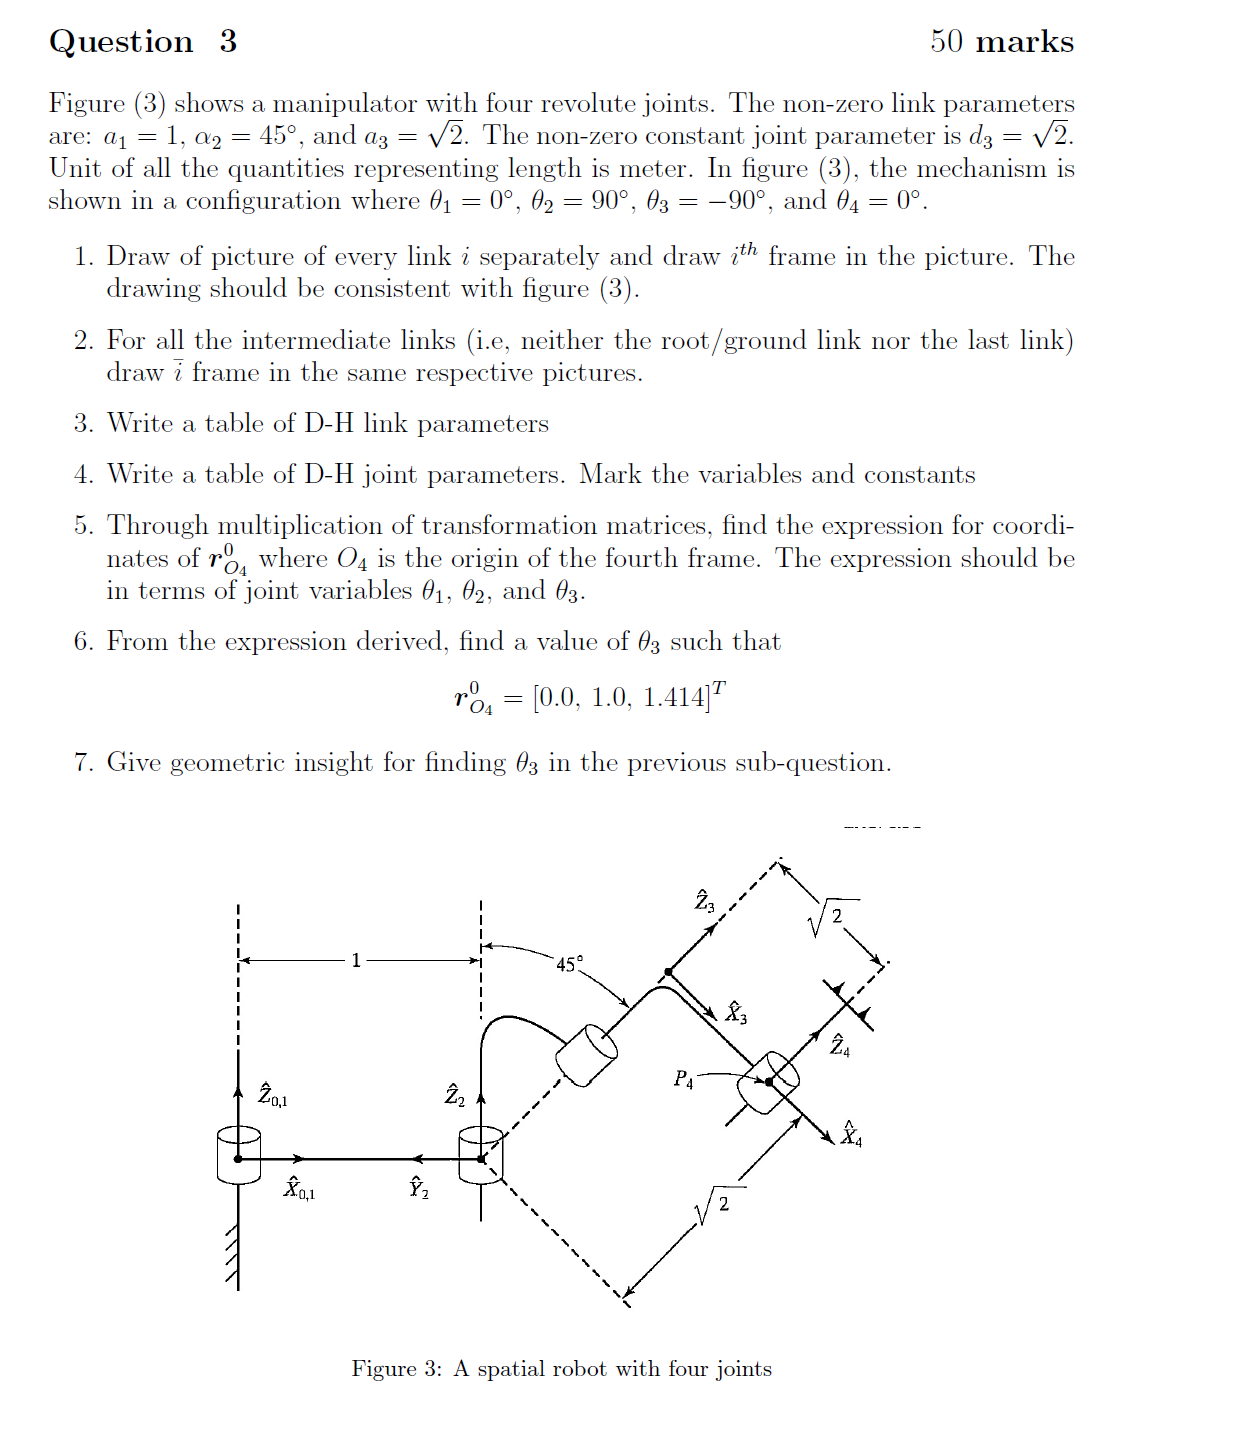